<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
BCG
</h1><center/>

**Link to the article** : https://medium.com/@soulawalid/evaluating-a-companys-portfolio-with-the-bcg-matrix-de90e1ad163e?sk=8f44a6d03a441bd9269e92c7b5a7306c

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Market_Share': [0.15, 0.10, 0.20, 0.25, 0.30],  # Current market share
    'Market_Value_n-1': [1.6, 0.9, 1.8, 2.4, 2.9],  # Market value relative in the previous period
    'Market_Value_n': [1.5, 1, 2, 2.5, 3]  # Market value relative in the current period
}

df = pd.DataFrame(data)
df

,Product,Market_Share,Market_Value_n-1,Market_Value_n
0,Product A,0.15,1.6,1.5
1,Product B,0.10,0.9,1.0
2,Product C,0.20,1.8,2.0
3,Product D,0.25,2.4,2.5
4,Product E,0.30,2.9,3.0


In [3]:
df['Market_Growth'] = ((df['Market_Value_n'] - df['Market_Value_n-1']) / df['Market_Value_n-1']) * 100

# Identify the largest and second-largest market share values
sorted_market_shares = df['Market_Share'].nlargest(2).values
largest_market_share = sorted_market_shares[0]
second_largest_market_share = sorted_market_shares[1]

# Calculate Relative Market Share
df['Relative_Market_Share'] = df['Market_Share'].copy()

# For the product with the largest market share, set its relative market share compared to the second-largest
df.loc[df['Market_Share'] == largest_market_share, 'Relative_Market_Share'] = (
    largest_market_share / second_largest_market_share
)

# For other products, set their relative market share compared to the largest
df.loc[df['Market_Share'] < largest_market_share, 'Relative_Market_Share'] = (
    df['Market_Share'] / largest_market_share
)

df

,Product,Market_Share,Market_Value_n-1,Market_Value_n,Market_Growth,Relative_Market_Share
0,Product A,0.15,1.6,1.5,-6.250000,0.500000
1,Product B,0.10,0.9,1.0,11.111111,0.333333
2,Product C,0.20,1.8,2.0,11.111111,0.666667
3,Product D,0.25,2.4,2.5,4.166667,0.833333
4,Product E,0.30,2.9,3.0,3.448276,1.200000


In [4]:
# I will be using them in the visualisation and also in the category function that I will show later
mean_growth = df['Market_Growth'].mean()
mrms = df['Relative_Market_Share'].mean()

In [5]:
def categorize_bc_matrix(row):
    if row['Market_Growth'] > mean_growth and row['Relative_Market_Share'] >= mrms:
        return 'Star'
    elif row['Market_Growth'] > mean_growth and row['Relative_Market_Share'] < mrms:
        return 'Question Mark'
    elif row['Market_Growth'] < mean_growth and row['Relative_Market_Share'] >= mrms:
        return 'Cash Cow'
    else:
        return 'Dog'

df['Category'] = df.apply(categorize_bc_matrix, axis=1)

df

,Product,Market_Share,Market_Value_n-1,Market_Value_n,Market_Growth,Relative_Market_Share,Category
0,Product A,0.15,1.6,1.5,-6.250000,0.500000,Dog
1,Product B,0.10,0.9,1.0,11.111111,0.333333,Question Mark
2,Product C,0.20,1.8,2.0,11.111111,0.666667,Question Mark
3,Product D,0.25,2.4,2.5,4.166667,0.833333,Cash Cow
4,Product E,0.30,2.9,3.0,3.448276,1.200000,Cash Cow


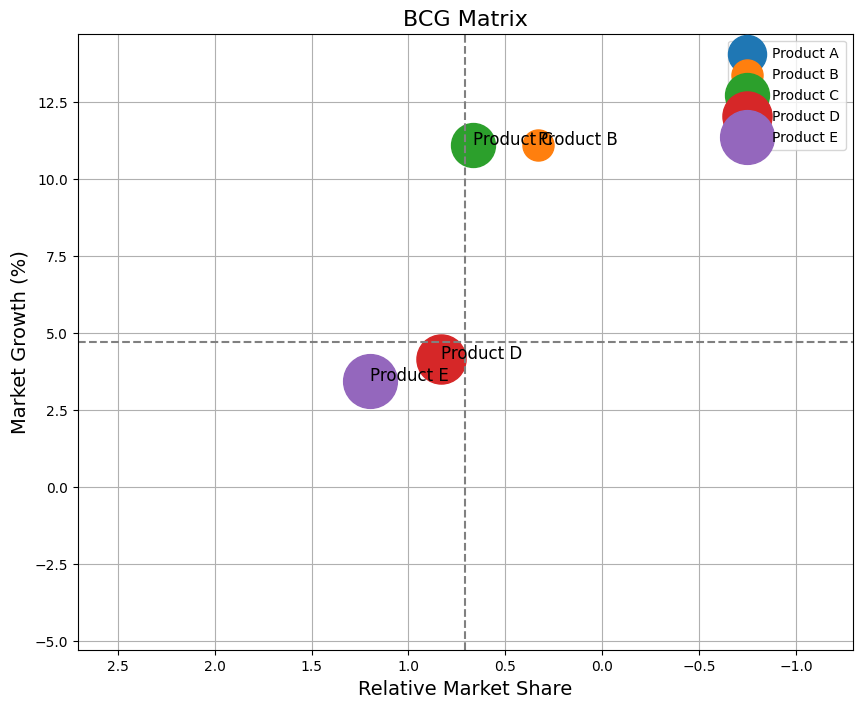

In [7]:
plt.figure(figsize=(10, 8))

bubble_sizes = df['Market_Value_n'] * 500 # you can adjust as needed :)

for i in range(df.shape[0]):
    plt.scatter(df['Relative_Market_Share'][i], df['Market_Growth'][i], 
                s=bubble_sizes[i], label=df['Product'][i])

for i, txt in enumerate(df['Product']):
    plt.annotate(txt, (df['Relative_Market_Share'][i], df['Market_Growth'][i]), fontsize=12)


plt.axhline(y=mean_growth, color='gray', linestyle='--')  
plt.axvline(x=mrms, color='gray', linestyle='--')   


plt.xlim(mrms + 2, mrms - 2) 
plt.ylim(mean_growth -10,mean_growth +10)  


plt.title('BCG Matrix', fontsize=16)
plt.xlabel('Relative Market Share', fontsize=14)
plt.ylabel('Market Growth (%)', fontsize=14)
plt.grid(True)


plt.legend()
plt.show()